In [15]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

<h1> Getting Data

In [2]:
#loading MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

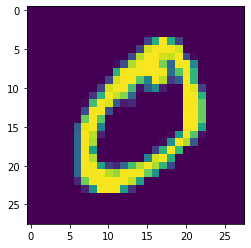

In [4]:
#visualizing the image in train data
plt.imshow(X_train[1])

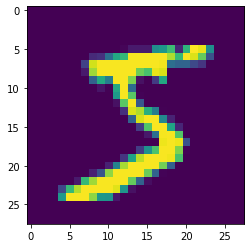

In [5]:
#visualizing the image in train data
plt.imshow(X_train[0])

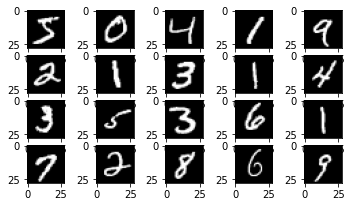

In [6]:
#visualizing the first 20 images in the dataset


for i in range(20):

    #subplot

    plt.subplot(5, 5, i+1)

    # plotting pixel data

    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

# show the figure

plt.show()

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Matrice containing 60000 element :
[ 60000 x [ 28 x [ 28 ] ] ]

In [9]:
# the image is in pixels which ranges from 0 to 255
# X_train[0]

In [10]:
# Convert the images from 2D to 1D (flattening them)

X_train_flat=X_train.reshape(len(X_train),28*28)

X_test_flat=X_test.reshape(len(X_test),28*28)

#checking the shape after flattening

print(X_train_flat.shape)

print(X_test_flat.shape)

(60000, 784)
(10000, 784)


In [13]:
X_train_flat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
#normalizing the pixel values
X_train_flat=X_train_flat/255
X_test_flat=X_test_flat/255

<h1> Model building

In [16]:
#Building a simple ANN model without hidden layer

In [17]:
#importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
#Step 1 : Defining the model
model=Sequential()
model.add(Dense(10,input_shape=(784,),activation='softmax'))

We are defining the model using the Sequential() function and adding the input shape and output layer to it. With that, we are using the softmax activation function as we have a multi-class classification problem and have more than two class labels.

In [19]:
#Step 2: Compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

We are compiling the model using the loss, optimizer, and metrics. Loss, we are using sparse_categorical_crossentropy as there are more than two labels in our dataset. For the optimizer, we have used Adam for updating the weights, to achieve minimum losses in the model and Accuracy as a metric.

In [20]:
#Step 3: Fitting the model
model.fit(X_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4644 - accuracy: 0.8802
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9231
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9251
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9278
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2551 - accuracy: 0.9286
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2526 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [21]:
#Step 4: Evaluating the model
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2625 - accuracy: 0.9272


[0.2625114619731903, 0.9272000193595886]

In [22]:
#Step 5 :Making predictions
y_predict = model.predict(X_test_flat)
y_predict[3] #printing the 3rd index

313/313 [==============================] - 0s 1ms/step


array([9.9980181e-01, 4.4434539e-12, 5.7414385e-05, 1.1932589e-06,
       1.0653393e-08, 2.5749519e-05, 9.7121061e-05, 2.4588376e-06,
       4.9728087e-06, 9.1854072e-06], dtype=float32)

In [23]:
# Here we get the index of the maximum value in the above-encoded vector. 
np.argmax(y_predict[3])

0

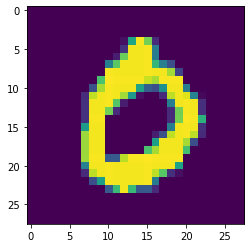

In [24]:
#checking if the predicting is correct
plt.imshow(X_test[3])

<h1> Confusion matrix

<AxesSubplot:>

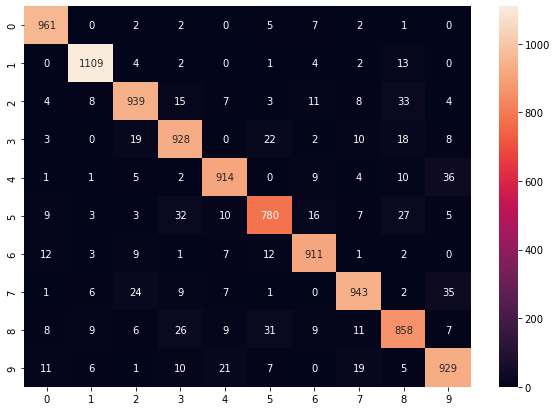

In [25]:
y_predict_labels=np.argmax(y_predict,axis=1)
#Confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_predict_labels)
#visualizaing confusion matrix with heatmap
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt='d')

<h1> Another model with hidden layers

In [26]:
model2=Sequential()
#adding first layer with 100 neurons
model2.add(Dense(100,input_shape=(784,),activation='relu'))
#second layer with 64 neurons
model2.add(Dense(64,activation='relu'))
#third layer with 32 neurons
model2.add(Dense(32,activation='relu'))
#output layer
model2.add(Dense(10,activation='softmax'))
#compliling the model
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model2.fit(X_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2574 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1115 - accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0771 - accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0625 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0327 - accuracy: 0.9889
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9911
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.023

In [27]:
#evaluating the model
model2.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9746


[0.1082664430141449, 0.9746000170707703]